In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit


In [30]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [31]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [32]:
class DecayingSineModel2021(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine2021(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel2021, self).__init__(decaying_sine2021, *args, **kwargs)

    def guess(self, data, **kwargs):
        #params = self.make_params(b= 1.22, d= 3.33)
        params = Parameters()
        params.add('b', value=1.1)
        params.add('d', value = 3.3, min= 80, max= 200)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [33]:

def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2)
    if year == '5054anyopioid2021.csv' or year == '3539anyopioid2020.csv':  
        model = DecayingSineModel2021()
        params = model.guess(df2['ccount'], x=df2['rate'])
        fit = model.fit(df2['ccount'], params, x=df2['rate'] )
    else:
        model = DecayingSineModel()
        params = model.guess(df2['ccount'], x=df2['rate'])
        fit = model.fit(df2['ccount'], params, x=df2['rate'] )
    return fit, df2

In [34]:
df2021 = pd.read_csv('5054anyopioid2021.csv')
df2021

,county,rate,num1,num2,num3
0,Mariposa,218.3400,94.2650,732.2575,77.19500
1,Lake,194.4425,82.1800,397.2800,71.48000
2,Trinity,152.2075,41.4725,810.8125,76.10250
3,Siskiyou,89.5250,24.3950,311.7800,44.76500
4,Nevada,89.2375,37.3925,201.3825,33.30750
5,Mendocino,78.7200,21.4500,201.5700,39.36000
6,San Francisco,77.7600,57.3850,103.0525,11.20000
7,Glenn,64.5575,17.5900,343.9050,32.28000
8,Shasta,60.4350,31.7275,123.7025,17.19500
9,Yuba,46.0950,12.5600,160.5300,23.04500


In [35]:
f,df2= getModel('5054anyopioid2021.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.250000
2    2.0  0.250000
3    3.0  0.250000
4    4.0  0.250000
..   ...       ...
95  95.0  0.933333
96  96.0  0.933333
97  97.0  0.933333
98  98.0  0.933333
99  99.0  0.933333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: 

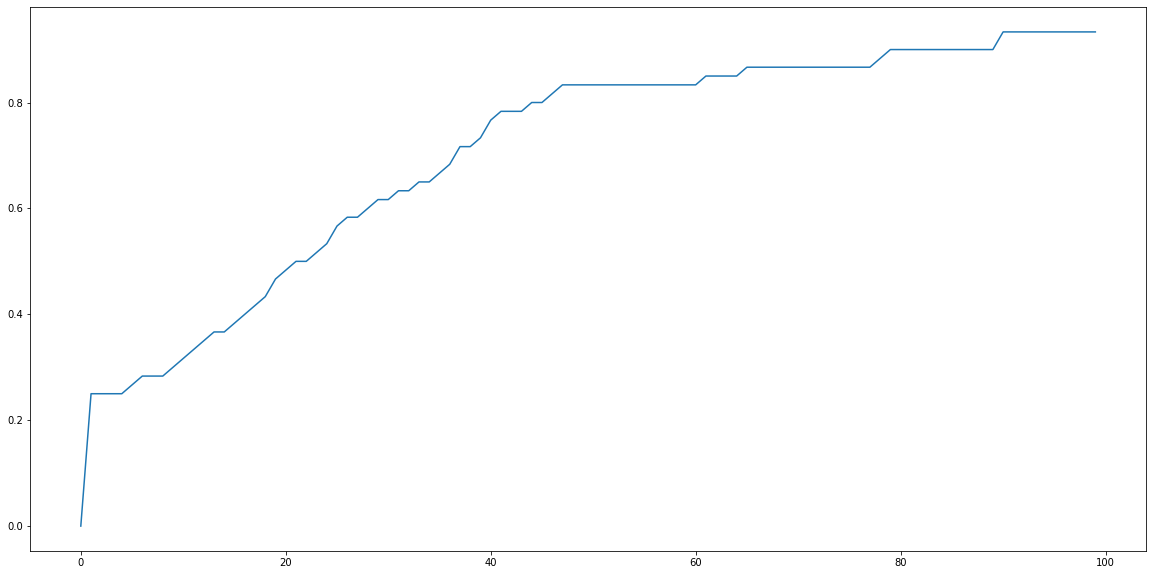

In [36]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [37]:
f.params["b"].value,f.params["d"].value

(1.4757911057974848, 81.91876545259395)

In [38]:
f,df2= getModel('5054anyopioid2020.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.383333
2    2.0  0.383333
3    3.0  0.383333
4    4.0  0.383333
..   ...       ...
95  95.0  0.966667
96  96.0  0.966667
97  97.0  0.966667
98  98.0  0.966667
99  99.0  0.966667

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: 

In [39]:
f.params["b"].value,f.params["d"].value

(1.154779665700406, 9.964695305337562)

In [40]:
df2

,rate,ccount
0,0.0,0.000000
1,1.0,0.383333
2,2.0,0.383333
3,3.0,0.383333
4,4.0,0.383333
...,...,...
95,95.0,0.966667
96,96.0,0.966667
97,97.0,0.966667
98,98.0,0.966667


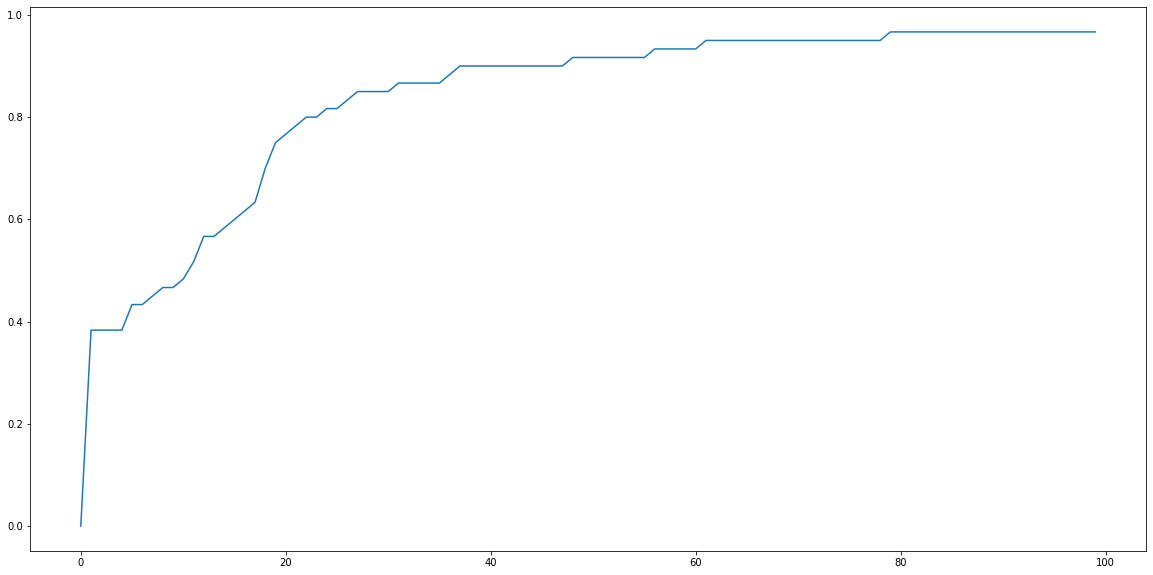

In [41]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [42]:
files = ['5054anyopioid2021.csv', '5054anyopioid2020.csv','5054anyopioid2019.csv','5054anyopioid2018.csv','5054anyopioid2017.csv']
bval = []
dval = []
year = []
for file in files:
    f,df2 = getModel(file)
    year.append(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

    rate    ccount
0    0.0  0.000000
1    1.0  0.250000
2    2.0  0.250000
3    3.0  0.250000
4    4.0  0.250000
..   ...       ...
95  95.0  0.933333
96  96.0  0.933333
97  97.0  0.933333
98  98.0  0.933333
99  99.0  0.933333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.383333
2    2.0  0.383333
3    3.0  0.383333
4    4.0  0.383333
..   ...       ...
95  95.0  0.966667
96  96.0  0.966667
97  97.0  0.966667
98  98.0  0.966667
99  99.0  0.966667

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.383333
2    2.0  0.383333
3    3.0  0.383333
4    4.0  0.383333
..   ...       ...
95  95.0  0.916667
96  96.0  0.916667
97  97.0  0.916667
98  98.0  0.916667
99  99.0  0.916667

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.383333
2    2.0  0.383333
3    3.0  0.383333
4    4.0  0.416667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 c

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_96349/1274465345.py:9: 

In [43]:
bval

[1.4757911057974848,
 1.154779665700406,
 0.8395356754821448,
 1.2731899397591033,
 0.9057677567202332]

In [44]:
year

['5054anyopioid2021.csv',
 '5054anyopioid2020.csv',
 '5054anyopioid2019.csv',
 '5054anyopioid2018.csv',
 '5054anyopioid2017.csv']

In [45]:
dval

[81.91876545259395,
 9.964695305337562,
 4.099558008897495,
 8.202009704169642,
 3.310919093574897]

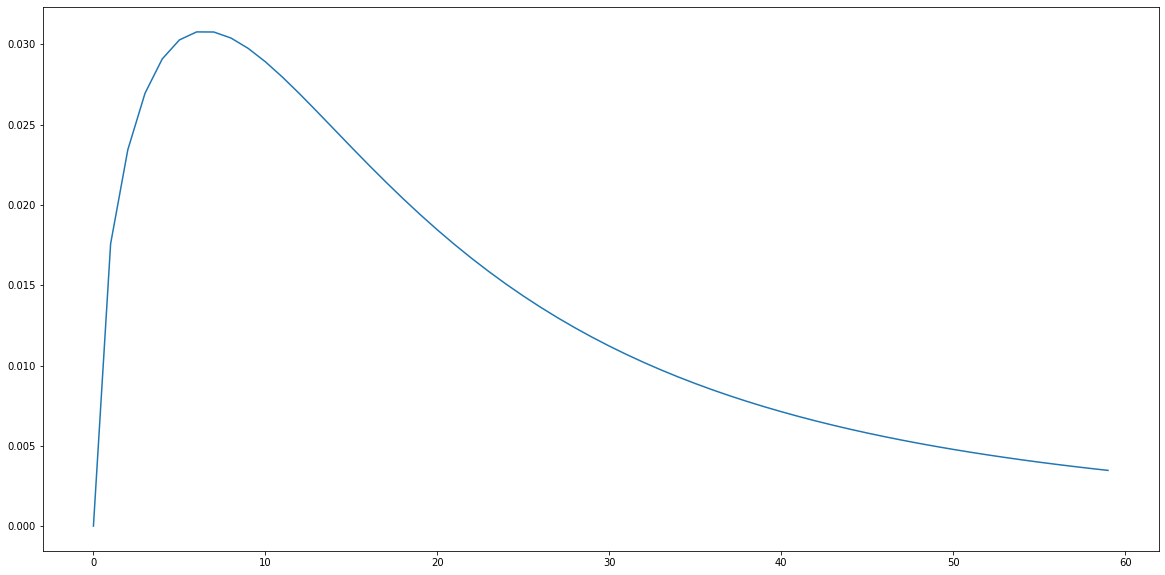

In [46]:
year_no=0
density_x=[]
rate_y=[]
for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2)) #derivativeofb&dequation
    rate_y.append(y_rate)

plt.plot(density_x,rate_y)

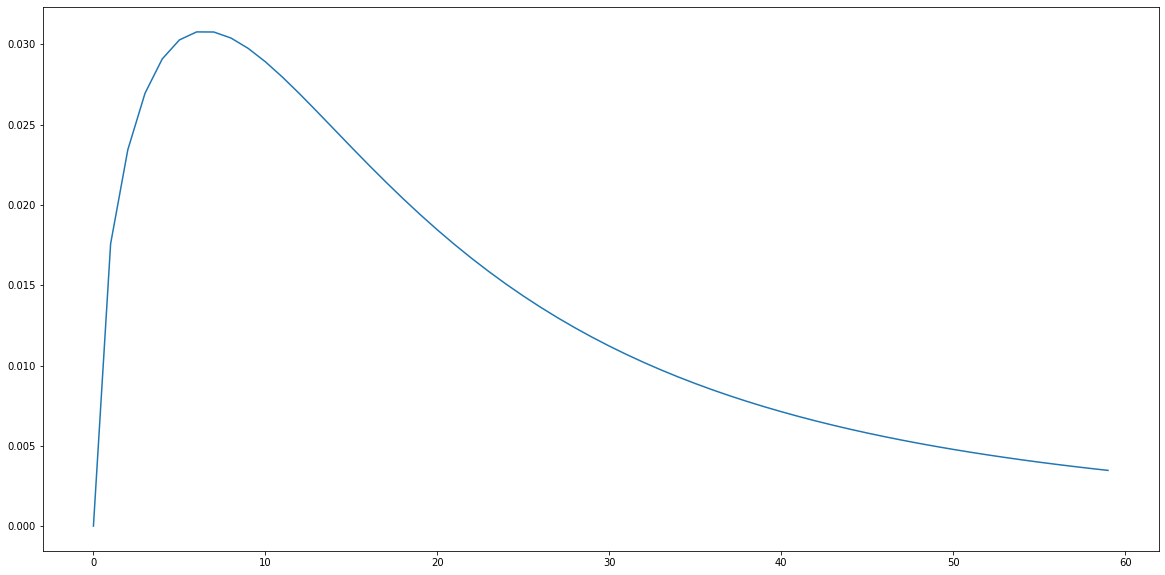

In [47]:
year_no=0
density_x=[]
rate_y=[]

for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

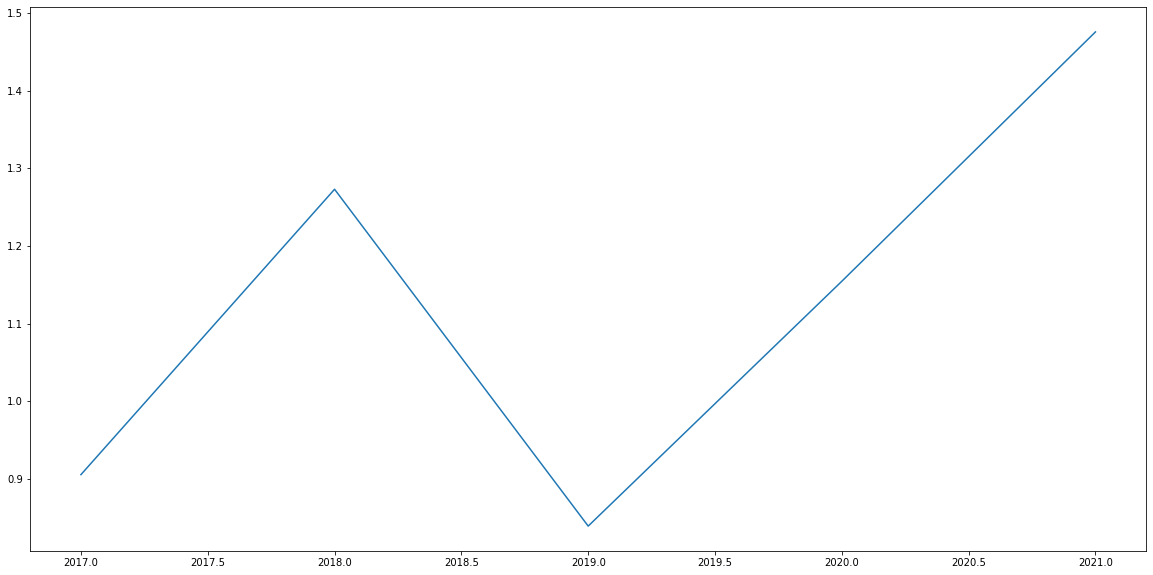

In [48]:
x = [2021,2020,2019,2018,2017]
y = bval
plt.plot(x,y )

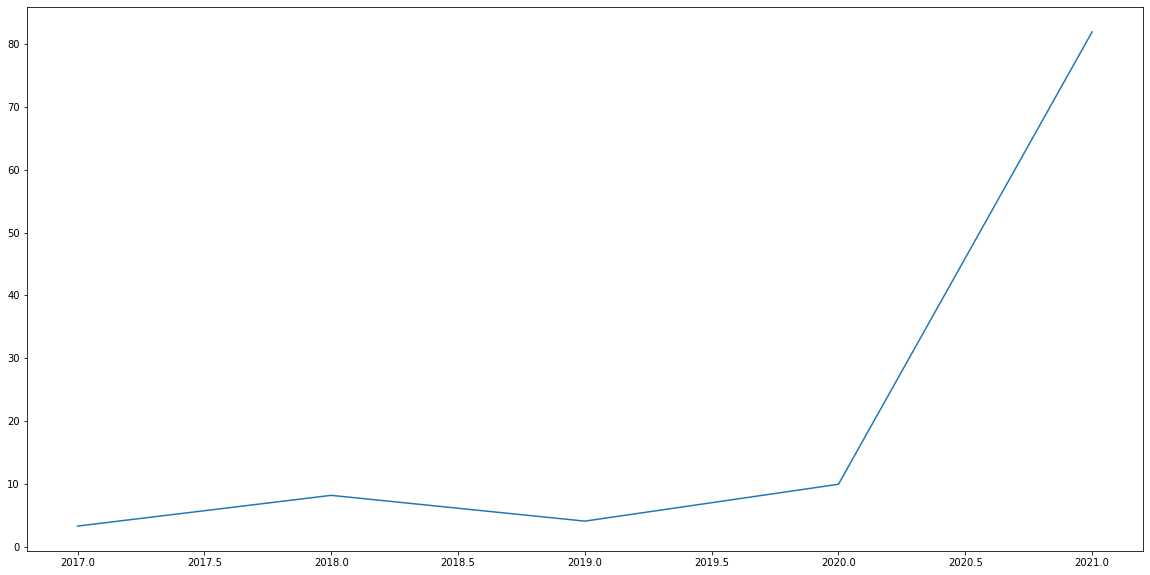

In [49]:
x = [2021,2020,2019,2018,2017]
y = dval
plt.plot(x,y )

In [50]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

In [51]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2
3
4


Text(0.5, 1.0, 'Density Curve: 50-54 Any Opioid Overdose Death Rates')

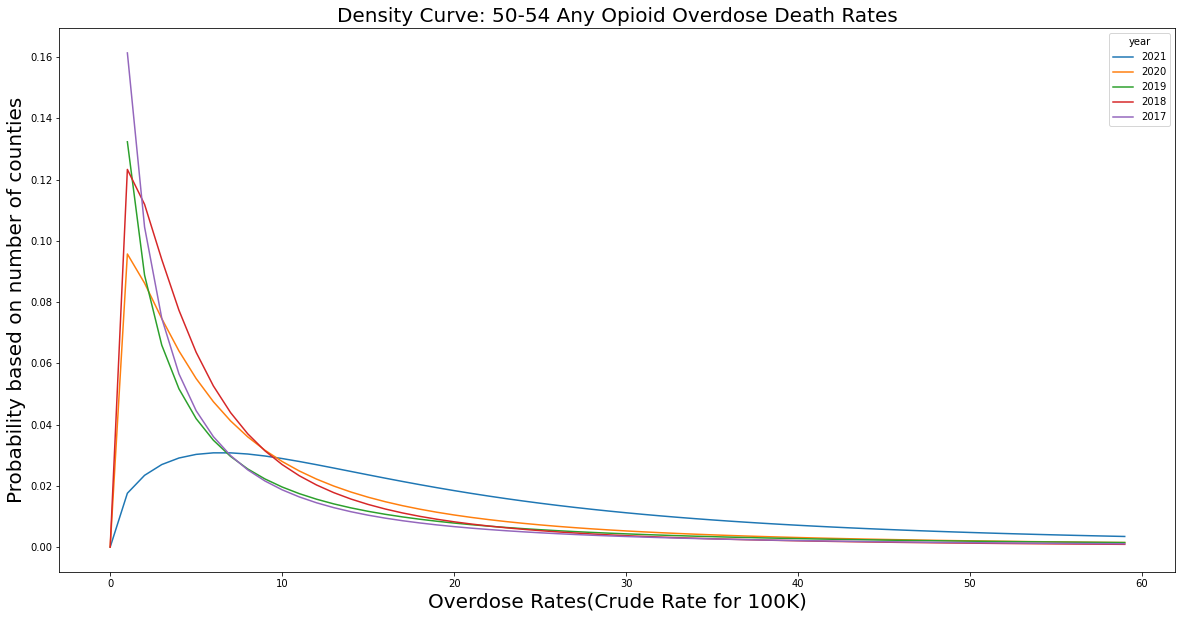

In [52]:
bval_1 = bval[0:5]
bval_1 = dval[0:5]
year2= [2021,2020,2019,2018,2017]
for m in range(len(bval_1)):
    print(m)
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(60):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(year2[m]))
plt.legend(title='year')
plt.xlabel("Overdose Rates(Crude Rate for 100K)", fontsize = 20)
plt.ylabel("Probability based on number of counties", fontsize = 20)
plt.title("Density Curve: 50-54 Any Opioid Overdose Death Rates", fontsize = 20)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_89527/1062718043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (d*b*pow(x,b-1))/(pow((q+d),2))


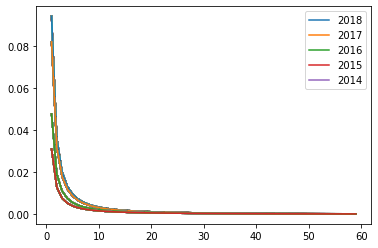

In [50]:
bval_2 = bval[4:]
dval_2 = dval[4:]
for m in range(len(bval_2)):
    x = []
    y= []
    b = bval_2[m]
    d = dval_2[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
        plt.plot(x,y,label= str(year2[m]))
    plt.plot(x,y)
plt.legend(["2018", "2017", "2016", "2015", "2014"])

In [ ]:
3#